In [1]:

##### import the necessary modules and set chart style####
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
mpl.style.use('bmh')
import pandas_datareader.data as web
import matplotlib.pylab as plt
from datetime import datetime
import statsmodels.api as sm
from pykalman import KalmanFilter
from math import sqrt


C:\Users\User\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [18]:

#scrape html from website and store 3rd DataFrame as our stock tickers - this is dictated to us by the structure of the html
stock_list = pd.read_html("https://www.marketwatch.com/tools/industry/stocklist.asp?bcind_ind=9535&amp;bcind_period=3mo")[3]

#convert the DataFrame of stocks into a list so we can easily iterate over it
stocks = stock_list[1].dropna()[1:].tolist()

#set empty list o hold the stock price DataFrames that we can later concatenate into a master frame
df_list = []

#not all stocks will return data so set up an empty list to store the stock tickers that actually successfully returns data
used_stocks = []

#iterate over stock tickers in list and download relevant data, storing said data and successfully downloaded tickers along the way
for stock in stocks:
    try:
        data = pd.DataFrame(web.DataReader(stock,data_source='iex',start='01/01/2013')['close'])
        data.columns = [stock]
        df_list.append(data)
        used_stocks.append(stock)
    except:
        pass

#concatenate list of individual tciker price DataFrames into one master DataFrame
df = pd.concat(df_list,axis=1)


5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y


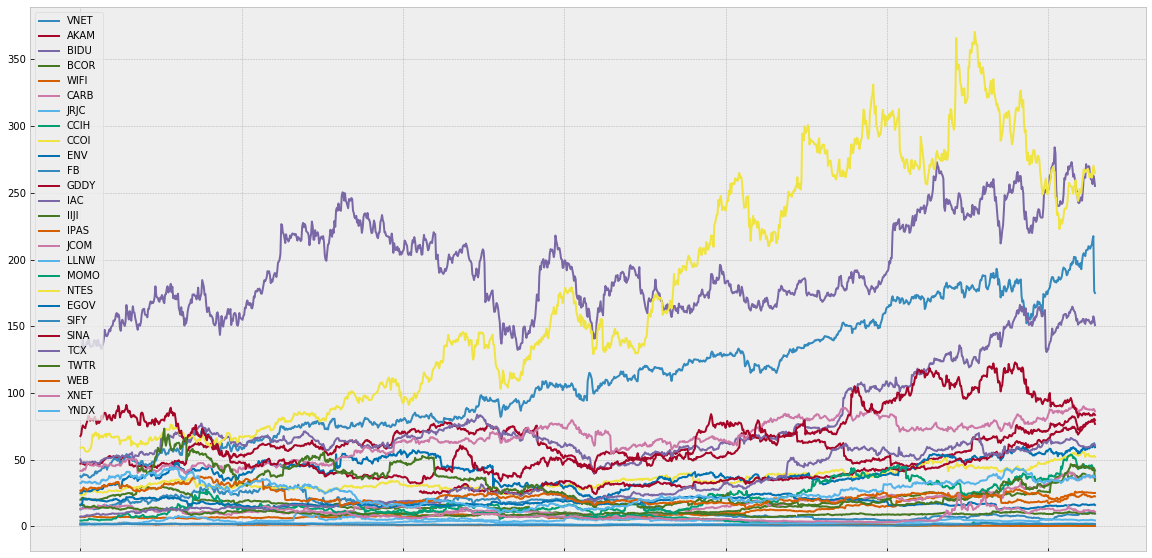

In [3]:

df.plot(figsize=(20,10))


In [19]:
df

,VNET,AKAM,BIDU,BCOR,WIFI,CARB,JRJC,CCIH,CCOI,ENV,...,MOMO,NTES,EGOV,SIFY,SINA,TCX,TWTR,WEB,XNET,YNDX
2013-07-30,12.78,47.07,131.690,20.02,7.05,13.40,1.2500,4.3800,23.5465,24.96,...,NaN,58.8725,16.3426,1.6279,67.740,7.40,NaN,26.870,NaN,32.48
2013-07-31,12.84,47.20,132.310,20.00,7.00,13.19,1.2450,4.3800,23.5219,24.89,...,NaN,59.0672,16.2018,1.6631,68.970,7.60,NaN,25.980,NaN,32.51
2013-08-01,13.21,47.64,134.930,21.42,7.01,13.35,1.3000,4.3700,23.9821,25.12,...,NaN,59.4010,16.8527,1.6719,73.678,7.44,NaN,27.410,NaN,33.72
2013-08-02,14.42,46.85,139.699,21.57,7.04,13.40,1.3000,4.4000,23.9164,27.28,...,NaN,59.1878,20.0808,1.6455,75.720,7.28,NaN,28.190,NaN,33.78
2013-08-05,14.37,46.90,133.890,21.30,7.09,13.36,1.4601,4.6700,24.0232,26.46,...,NaN,59.0116,20.9428,1.6367,74.480,7.56,NaN,29.220,NaN,33.50
2013-08-06,13.81,46.26,134.560,20.90,7.06,13.65,1.4600,4.7100,24.0396,26.47,...,NaN,58.0010,20.4062,1.6191,74.170,7.76,NaN,28.160,NaN,33.35
2013-08-07,13.68,46.09,135.330,20.85,7.03,13.66,1.4100,4.6300,23.7109,26.22,...,NaN,56.4898,20.1423,1.6015,73.600,7.80,NaN,28.200,NaN,32.76
2013-08-08,13.69,46.63,135.740,21.00,7.51,13.71,1.5200,4.6600,26.6367,26.42,...,NaN,56.1746,20.2391,1.6103,76.340,8.12,NaN,28.160,NaN,33.00
2013-08-09,13.78,46.52,138.190,20.65,7.78,13.70,1.4800,4.6300,26.4148,26.44,...,NaN,55.9984,20.0984,1.6015,78.060,8.52,NaN,26.890,NaN,33.04
2013-08-12,13.70,46.71,136.730,20.46,7.56,13.70,1.6500,4.6400,26.5546,26.28,...,NaN,56.1746,20.2303,1.5927,80.350,8.24,NaN,27.530,NaN,32.68


In [21]:
df.to_csv('data.csv')

In [24]:
df = df.drop(['GDDY','MOMO','TWTR','XNET','IIJI'], axis=1)


ValueError: labels ['GDDY' 'MOMO' 'TWTR' 'XNET' 'IIJI'] not contained in axis

In [60]:
df

,VNET,AKAM,BIDU,BCOR,WIFI,CARB,JRJC,CCIH,CCOI,ENV,...,IPAS,JCOM,LLNW,NTES,EGOV,SIFY,SINA,TCX,WEB,YNDX
2013-07-30,12.78,47.07,131.690,20.02,7.05,13.40,1.2500,4.3800,23.5465,24.96,...,2.1300,41.7089,2.42,58.8725,16.3426,1.6279,67.740,7.40,26.870,32.48
2013-07-31,12.84,47.20,132.310,20.00,7.00,13.19,1.2450,4.3800,23.5219,24.89,...,2.1900,41.5004,2.40,59.0672,16.2018,1.6631,68.970,7.60,25.980,32.51
2013-08-01,13.21,47.64,134.930,21.42,7.01,13.35,1.3000,4.3700,23.9821,25.12,...,2.2800,42.0263,2.42,59.4010,16.8527,1.6719,73.678,7.44,27.410,33.72
2013-08-02,14.42,46.85,139.699,21.57,7.04,13.40,1.3000,4.4000,23.9164,27.28,...,2.2300,41.7905,2.38,59.1878,20.0808,1.6455,75.720,7.28,28.190,33.78
2013-08-05,14.37,46.90,133.890,21.30,7.09,13.36,1.4601,4.6700,24.0232,26.46,...,2.1900,43.2322,2.34,59.0116,20.9428,1.6367,74.480,7.56,29.220,33.50
2013-08-06,13.81,46.26,134.560,20.90,7.06,13.65,1.4600,4.7100,24.0396,26.47,...,2.2500,42.5794,2.31,58.0010,20.4062,1.6191,74.170,7.76,28.160,33.35
2013-08-07,13.68,46.09,135.330,20.85,7.03,13.66,1.4100,4.6300,23.7109,26.22,...,2.2500,42.6519,2.20,56.4898,20.1423,1.6015,73.600,7.80,28.200,32.76
2013-08-08,13.69,46.63,135.740,21.00,7.51,13.71,1.5200,4.6600,26.6367,26.42,...,2.1800,44.5469,2.19,56.1746,20.2391,1.6103,76.340,8.12,28.160,33.00
2013-08-09,13.78,46.52,138.190,20.65,7.78,13.70,1.4800,4.6300,26.4148,26.44,...,2.0700,46.4692,2.10,55.9984,20.0984,1.6015,78.060,8.52,26.890,33.04
2013-08-12,13.70,46.71,136.730,20.46,7.56,13.70,1.6500,4.6400,26.5546,26.28,...,2.0600,47.5844,2.06,56.1746,20.2303,1.5927,80.350,8.24,27.530,32.68


In [30]:

#NOTE CRITICAL LEVEL HAS BEEN SET TO 5% FOR COINTEGRATION TEST
def find_cointegrated_pairs(dataframe, critial_level = 0.05):
    n = dataframe.shape[1] # the length of dateframe
    pvalue_matrix = np.ones((n, n)) # initialize the matrix of p
    keys = dataframe.columns # get the column names
    pairs = [] # initilize the list for cointegration
    for i in range(n):
        for j in range(i+1, n): # for j bigger than i
            stock1 = dataframe[keys[i]] # obtain the price of "stock1"
            stock2 = dataframe[keys[j]]# obtain the price of "stock2"
            result = sm.tsa.stattools.coint(stock1, stock2) # get conintegration
            pvalue = result[1] # get the pvalue
            pvalue_matrix[i, j] = pvalue
            if pvalue < critial_level: # if p-value less than the critical level
                pairs.append((keys[i], keys[j], pvalue)) # record the contract with that p-value
    return pvalue_matrix, pairs
    

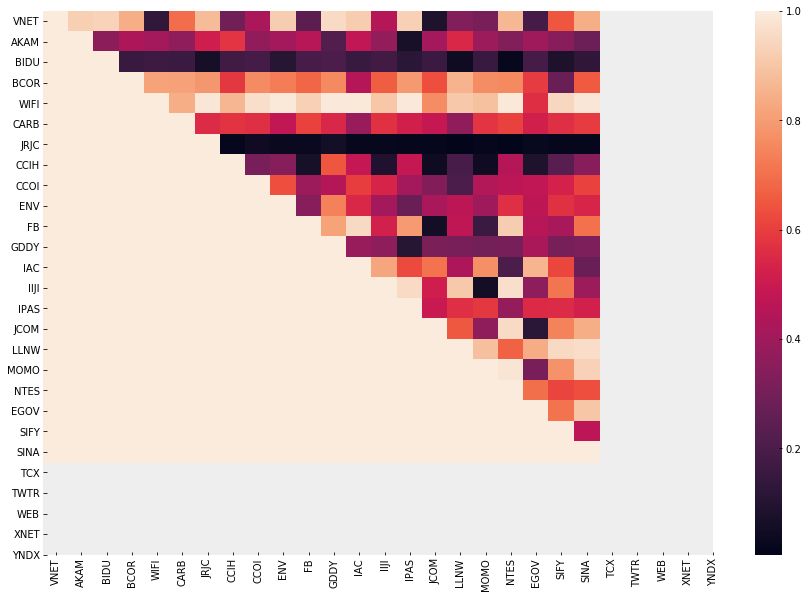

In [44]:

#set up the split point for our "training data" on which to perform the co-integration test (the remaining dat awill be fed to our backtest function)
split = int(len(df) * .68)

#run our dataframe (up to the split point) of ticker price data through our co-integration function and store results
pvalue_matrix,pairs = find_cointegrated_pairs(df[:split])

#convert our matrix of stored results into a DataFrame
pvalue_matrix_df = pd.DataFrame(pvalue_matrix)

#use Seaborn to plot a heatmap of our results matrix
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(pvalue_matrix_df,xticklabels=used_stocks,yticklabels=used_stocks,ax=ax)


In [45]:

for pair in pairs:
    print("Stock {} and stock {} has a co-integration score of {}".format(pair[0],pair[1],round(pair[2],4)))


Stock BIDU and stock EGOV has a co-integration score of 0.0433
Stock BIDU and stock SINA has a co-integration score of 0.0228
Stock JRJC and stock CCIH has a co-integration score of 0.021
Stock JRJC and stock CCOI has a co-integration score of 0.0476
Stock JRJC and stock ENV has a co-integration score of 0.0291
Stock JRJC and stock FB has a co-integration score of 0.0319
Stock JRJC and stock IPAS has a co-integration score of 0.0235
Stock JRJC and stock JCOM has a co-integration score of 0.0233
Stock JRJC and stock LLNW has a co-integration score of 0.0199
Stock JRJC and stock NTES has a co-integration score of 0.0198
Stock JRJC and stock EGOV has a co-integration score of 0.0068
Stock JRJC and stock SIFY has a co-integration score of 0.0193
Stock JRJC and stock SINA has a co-integration score of 0.0057
Stock JRJC and stock TCX has a co-integration score of 0.026
Stock JRJC and stock WEB has a co-integration score of 0.0205
Stock JRJC and stock YNDX has a co-integration score of 0.0197

In [41]:

def KalmanFilterAverage(x):
  # Construct a Kalman filter
    kf = KalmanFilter(transition_matrices = [1],
    observation_matrices = [1],
    initial_state_mean = 0,
    initial_state_covariance = 1,
    observation_covariance=1,
    transition_covariance=.01)

  # Use the observed values of the price to get a rolling mean
    state_means, _ = kf.filter(x.values)
    state_means = pd.Series(state_means.flatten(), index=x.index)
    return state_means

# Kalman filter regression
def KalmanFilterRegression(x,y):
    delta = 1e-3
    trans_cov = delta / (1 - delta) * np.eye(2) # How much random walk wiggles
    obs_mat = np.expand_dims(np.vstack([[x], [np.ones(len(x))]]).T, axis=1)

    kf = KalmanFilter(n_dim_obs=1, n_dim_state=2, # y is 1-dimensional, (alpha, beta) is 2-dimensional
    initial_state_mean=[0,0],
    initial_state_covariance=np.ones((2, 2)),
    transition_matrices=np.eye(2),
    observation_matrices=obs_mat,
    observation_covariance=2,
    transition_covariance=trans_cov)

    # Use the observations y to get running estimates and errors for the state parameters
    state_means, state_covs = kf.filter(y.values)
    return state_means

def half_life(spread):
    spread_lag = spread.shift(1)
    spread_lag.iloc[0] = spread_lag.iloc[1]
    spread_ret = spread - spread_lag
    spread_ret.iloc[0] = spread_ret.iloc[1]
    spread_lag2 = sm.add_constant(spread_lag)
    model = sm.OLS(spread_ret,spread_lag2)
    res = model.fit()
    halflife = int(round(-np.log(2) / res.params[1],0))

    if halflife <= 0:
        halflife = 1
    return halflife


In [67]:

def backtest(df,s1, s2):
    #############################################################
    # INPUT:
    # DataFrame of prices
    # s1: the symbol of contract one
    # s2: the symbol of contract two
    # x: the price series of contract one
    # y: the price series of contract two
    # OUTPUT:
    # df1['cum rets']: cumulative returns in pandas data frame
    # sharpe: Sharpe ratio
    # CAGR: Compound Annual Growth Rate

    x = df[s1]
    y = df[s2]

    # run regression (including Kalman Filter) to find hedge ratio and then create spread series
    df1 = pd.DataFrame({'y':y,'x':x})
    df1.index = pd.to_datetime(df1.index)
    state_means = KalmanFilterRegression(KalmanFilterAverage(x),KalmanFilterAverage(y))

    df1['hr'] = - state_means[:,0]
    df1['spread'] = df1.y + (df1.x * df1.hr)

    # calculate half life
    halflife = half_life(df1['spread'])

    # calculate z-score with window = half life period
    meanSpread = df1.spread.rolling(window=halflife).mean()
    stdSpread = df1.spread.rolling(window=halflife).std()
    df1['zScore'] = (df1.spread-meanSpread)/stdSpread

    ##############################################################
    # trading logic
    entryZscore = 2
    exitZscore = 0

    #set up num units long
    df1['long entry'] = ((df1.zScore < - entryZscore) & ( df1.zScore.shift(1) > - entryZscore))
    df1['long exit'] = ((df1.zScore > - exitZscore) & (df1.zScore.shift(1) < - exitZscore)) 
    df1['num units long'] = np.nan 
    df1.loc[df1['long entry'],'num units long'] = 1 
    df1.loc[df1['long exit'],'num units long'] = 0 
    df1['num units long'][0] = 0 
    df1['num units long'] = df1['num units long'].fillna(method='pad') 
    df1['short entry'] = ((df1.zScore > entryZscore) & ( df1.zScore.shift(1) < entryZscore))
    df1['short exit'] = ((df1.zScore < exitZscore) & (df1.zScore.shift(1) > exitZscore))
    df1.loc[df1['short entry'],'num units short'] = -1
    df1.loc[df1['short exit'],'num units short'] = 0
    df1['num units short'][0] = 0
    df1['num units short'] = df1['num units short'].fillna(method='pad')

    df1['numUnits'] = df1['num units long'] + df1['num units short']
    df1['spread pct ch'] = (df1['spread'] - df1['spread'].shift(1)) / ((df1['x'] * abs(df1['hr'])) + df1['y'])
    df1['port rets'] = df1['spread pct ch'] * df1['numUnits'].shift(1)

    df1['cum rets'] = df1['port rets'].cumsum()
    df1['cum rets'] = df1['cum rets'] + 1

    ##############################################################

    try:
        sharpe = ((df1['port rets'].mean() / df1['port rets'].std()) * sqrt(252))
    except ZeroDivisionError:
        sharpe = 0.0

    ##############################################################
    start_val = 1
    end_val = df1['cum rets'].iat[-1]

    start_date = df1.iloc[0].name
    end_date = df1.iloc[-1].name

    days = (end_date - start_date).days

    CAGR = round(((float(end_val) / float(start_val)) ** (252.0/days)) - 1,4)

    df1[s1+ " "+s2] = df1['cum rets']

    return df1[s1+" "+s2], sharpe, CAGR


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


The pair BIDU and EGOV produced a Sharpe Ratio of 1.59 and a CAGR of 0.082
The pair BIDU and SINA produced a Sharpe Ratio of 0.0 and a CAGR of 0.0
The pair JRJC and CCIH produced a Sharpe Ratio of 0.0 and a CAGR of 0.0
The pair JRJC and CCOI produced a Sharpe Ratio of 0.77 and a CAGR of 0.0974
The pair JRJC and ENV produced a Sharpe Ratio of 0.61 and a CAGR of 0.0912
The pair JRJC and FB produced a Sharpe Ratio of -0.13 and a CAGR of -0.0211
The pair JRJC and IPAS produced a Sharpe Ratio of 0.78 and a CAGR of 0.2505
The pair JRJC and JCOM produced a Sharpe Ratio of 0.13 and a CAGR of 0.0192
The pair JRJC and LLNW produced a Sharpe Ratio of 0.11 and a CAGR of 0.0194
The pair JRJC and NTES produced a Sharpe Ratio of 0.05 and a CAGR of 0.0089
The pair JRJC and EGOV produced a Sharpe Ratio of 0.52 and a CAGR of 0.0698
The pair JRJC and SIFY produced a Sharpe Ratio of 0.23 and a CAGR of 0.0513
The pair JRJC and SINA produced a Sharpe Ratio of -0.47 and a CAGR of -0.0815
The pair JRJC and TC

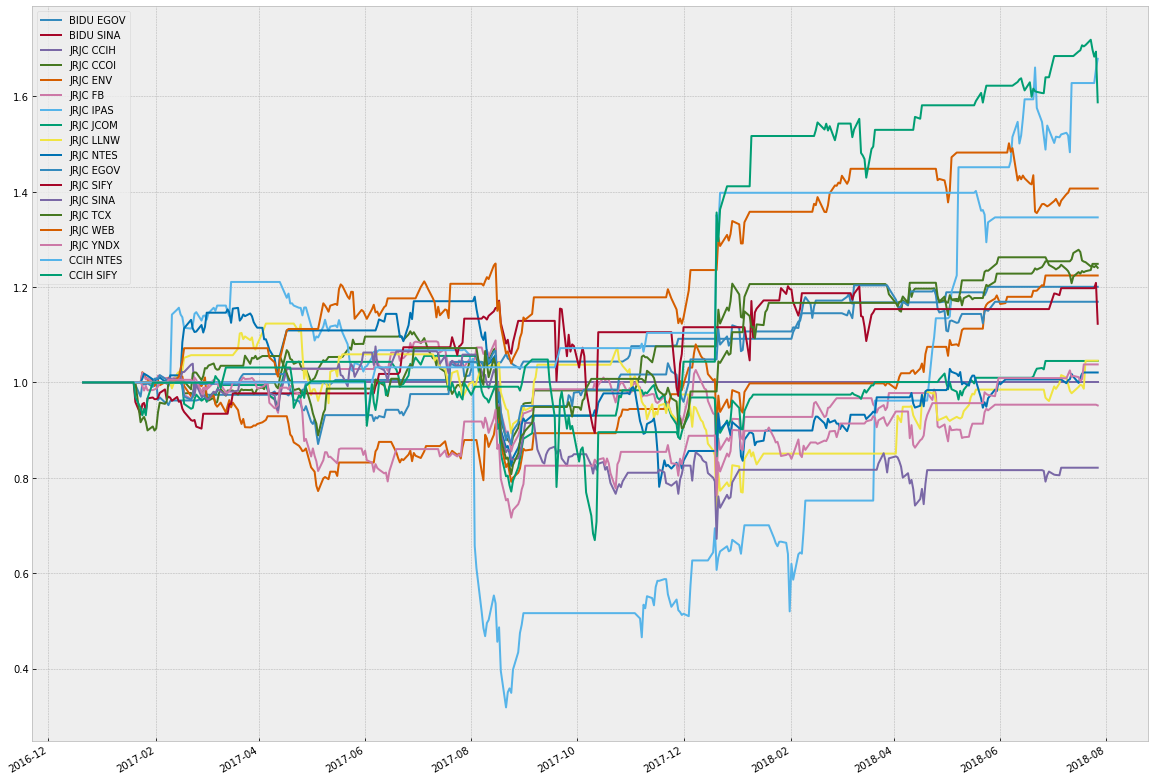

In [70]:
results = []

for pair in pairs:
    rets, sharpe,  CAGR = backtest(df[split:],pair[0],pair[1])
    results.append(rets)
    print("The pair {} and {} produced a Sharpe Ratio of {} and a CAGR of {}".format(pair[0],pair[1],round(sharpe,2),round(CAGR,4)))
    rets.plot(figsize=(20,15),legend=True)


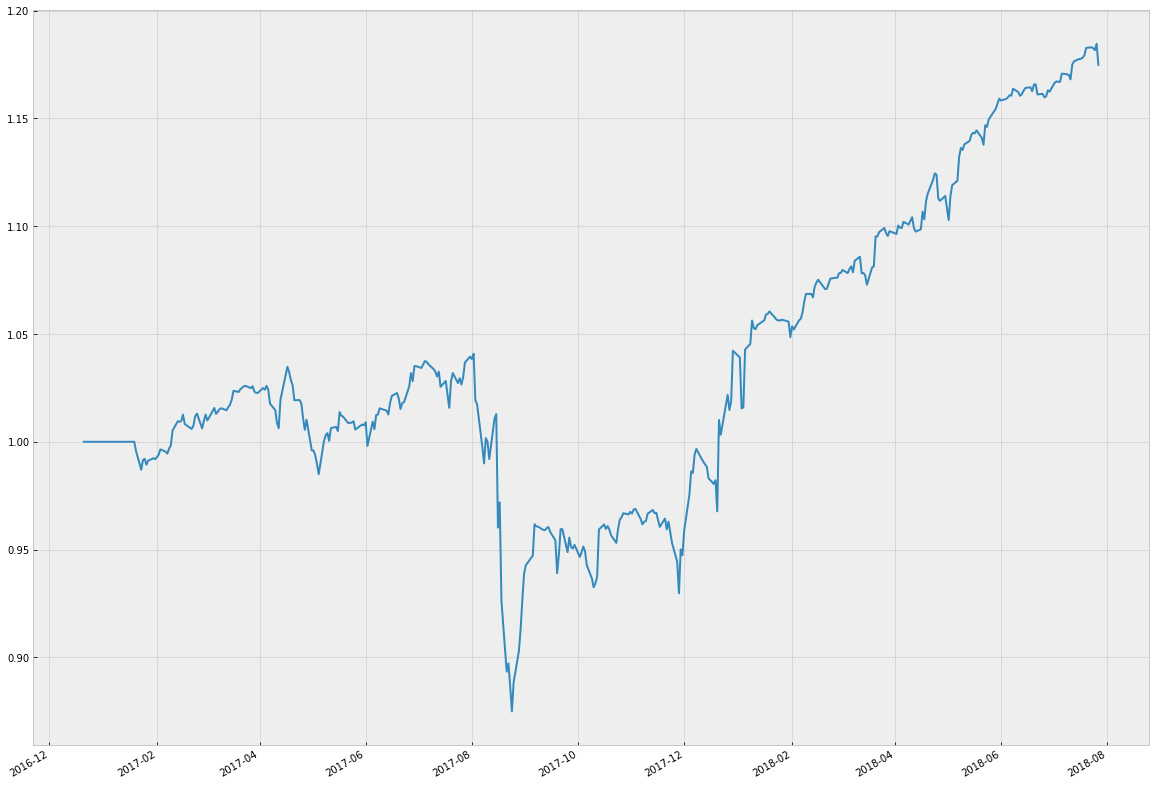

In [71]:

#concatenatge together the individual equity curves into a single DataFrame
results_df = pd.concat(results,axis=1).dropna()

#equally weight each equity curve by dividing each by the number of pairs held in the DataFrame
results_df /= len(results_df.columns)

#sum up the equally weighted equity curves to get our final equity curve
final_res = results_df.sum(axis=1)

#plot the chart of our final equity curve
final_res.plot(figsize=(20,15))


In [57]:

results = []



for pair in pairs:
    rets, sharpe,  CAGR = backtest(df[split:],pair[0],pair[1])
    results.append(rets)
    print("The pair {} and {} produced a Sharpe Ratio of {} and a CAGR of {}".format(pair[0],pair[1],round(sharpe,2),round(CAGR,4)))
    rets.plot(figsize=(20,15),legend=True)


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


KeyError: 'short entry'

In [61]:
def backtest(s1, s2, x, y ):
#############################################################
# INPUT:
# s1: the symbol of contract one
# s2: the symbol of contract two
# x: the price series of contract one
# y: the price series of contract two
# OUTPUT:
# df1['cum rets']: cumulative returns in pandas data frame
# sharpe: sharpe ratio
# CAGR: CAGR

# run regression to find hedge ratio and then create spread series
df1 = pd.DataFrame({'y':y,'x':x})
state_means = KalmanFilterRegression(KalmanFilterAverage(x),KalmanFilterAverage(y))

df1['hr'] = - state_means[:,0]
df1['spread'] = df1.y + (df1.x * df1.hr)

# calculate half life
halflife = half_life(df1['spread'])

# calculate z-score with window = half life period

meanSpread = df1.spread.rolling(window=halflife).mean()
stdSpread = df1.spread.rolling(window=halflife).std()
df1['zScore'] = (df1.spread-meanSpread)/stdSpread

##############################################################
# trading logic
entryZscore = 2
exitZscore = 0

#set up num units long
df1['long entry'] = ((df1.zScore < - entryZscore) & ( df1.zScore.shift(1) > - entryZscore))
df1['long exit'] = ((df1.zScore > - exitZscore) & (df1.zScore.shift(1) < - exitZscore)) df1['num units long'] = np.nan df1.loc[df1['long entry'],'num units long'] = 1 df1.loc[df1['long exit'],'num units long'] = 0 df1['num units long'][0] = 0 df1['num units long'] = df1['num units long'].fillna(method='pad') #set up num units short df1['short entry'] = ((df1.zScore > entryZscore) & ( df1.zScore.shift(1) < entryZscore))
df1['short exit'] = ((df1.zScore < exitZscore) & (df1.zScore.shift(1) > exitZscore))
df1.loc[df1['short entry'],'num units short'] = -1
df1.loc[df1['short exit'],'num units short'] = 0
df1['num units short'][0] = 0
df1['num units short'] = df1['num units short'].fillna(method='pad')

df1['numUnits'] = df1['num units long'] + df1['num units short']
df1['spread pct ch'] = (df1['spread'] - df1['spread'].shift(1)) / ((df1['x'] * abs(df1['hr'])) + df1['y'])
df1['port rets'] = df1['spread pct ch'] * df1['numUnits'].shift(1)

df1['cum rets'] = df1['port rets'].cumsum()
df1['cum rets'] = df1['cum rets'] + 1

name = "bt"+ s1 + "-" + s2 + ".csv"
df1.to_csv(name)
##############################################################

try:
sharpe = ((df1['port rets'].mean() / df1['port rets'].std()) * sqrt(252))
except ZeroDivisionError:
sharpe = 0.0

##############################################################
start_val = 1
end_val = df1['cum rets'].iat[-1]

start_date = df1.iloc[0].name
end_date = df1.iloc[-1].name
days = (end_date - start_date).days

CAGR = round(((float(end_val) / float(start_val)) ** (252.0/days)) - 1,4)

return df1['cum rets'], sharpe, CAGR

IndentationError: expected an indented block (<ipython-input-61-1cab61697d0c>, line 14)